In this notebook, we look at 2 very striking collections of datasets

* **The Anscombe Quartet**

An ensemble of 4 small datasets with only 11 points each.

* And the  **Datasaurus Dozen dataset**



A collection of 12 [datasets](https://www.autodeskresearch.com/publications/samestats) specifically created to show how to generate datasets that not only **share** the same statistical properties but are also very visually different.

These 2 groups of datasets share the exact same statistics in terms of:

* correlation, 
* mean, 
* standard deviation 
* and regression coefficients.


Let's start with the Anscombe Quartet dataset.

We need to import the pandas, numpy and matplotlib librairies and load the dataset into a dataframe.




In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Note that the separator is a ';' instead of the default ','
df = pd.read_csv('./data/anscombes.csv', sep = ';')


The dataframe has 3 columns, one for the dataset
and 2 for the x and y variables.




In [47]:
print("data shape: {}".format(df.shape))
df.head()

data shape: (44, 3)


,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


We can see right away that the 4 datasets have the same **mean** and **standard deviation** for both the x and y variables up to the second decimal.

In [48]:
df.groupby(by = 'dataset').agg([np.mean,np.std]).reset_index()

dataset    x                   y          
          mean       std      mean       std
0       I    9  3.316625  7.500909  2.031568
1      II    9  3.316625  7.500909  2.031657
2     III    9  3.316625  7.500000  2.030424
3      IV    9  3.316625  7.500909  2.030579

However, these 4 datasets all look very different.


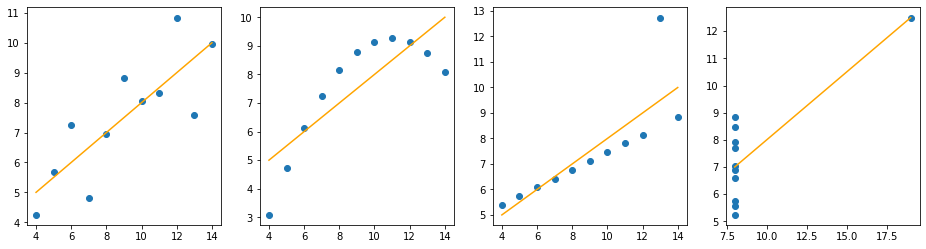

In [49]:
fig,ax = plt.subplots(1,4, figsize = (16,4))

for k,name in np.ndenumerate(df.dataset.unique()):
    cond = df.dataset == name
    # polynomial interpolation degree 1
    sing = np.polyfit(df[cond].x,df[cond].y, 1)
    sing_x    = np.linspace(df[cond].x.min(),df[cond].x.max(), 3)
    sing_y    = sing[0] * sing_x + sing[1]

    plt.subplot(1,4,k[0]+1)
    plt.scatter(df[cond].x,df[cond].y)
    plt.plot(sing_x,sing_y, color = 'orange')



These plots really illustrate the importance of taking the time to visualize the data
and not only rely on its statistical properties.

In the code above, we use the ```numpy.polyfit``` function to quickly calculate the coefficients for the linear interpolation line.


In [24]:
?np.polyfit

The numpy polyfit function takes the two variables *x* and *y* as input
and a degree as parameter.

So for instance, to get the coefficients
for a **quadratic interpolation**,
of the 1st dataset we would set the degree parameter to 2


In [50]:
cond = df.dataset == 'I'

quad = np.polyfit(df[cond].x,df[cond].y, 2)

print(quad)


[-0.03162005  1.06925175  0.7550676 ]


We can check that all 4 Anscombe datasets have the same intercept and slope
up to 2 digits


In [28]:
for dataset in df.dataset.unique():
    cond = df.dataset == dataset
    sing = np.polyfit(df[cond].x,df[cond].y, 1)
    print("slope {:.2f} Intercept {:.2f}".format(sing[0],sing[1]))


slope 0.50 Intercept 3.00
slope 0.50 Intercept 3.00
slope 0.50 Intercept 3.00
slope 0.50 Intercept 3.00


## The Datasaurus Dozen dataset
Let's now load the Datasaurus Dozen dataset which is even more surprising.

In [51]:
df = pd.read_csv('./data/DatasaurusDozen.csv')
print("data shape: {}".format(df.shape))

df.head()

data shape: (1846, 3)


,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


Similarly to the Anscombe quartet we have 3 columns, one for the dataset
and 2 for the x and y variables

The Datasaurus Dozen is composed of the following 12 datasets


In [61]:
print("\n=== Datasaurus Dozen datasets".format())
print('\n- ' + '\n- '.join(df.dataset.unique()))


=== Datasaurus Dozen datasets

- dino
- away
- h_lines
- v_lines
- x_shape
- star
- high_lines
- dots
- circle
- bullseye
- slant_up
- slant_down
- wide_lines


These 12 datasets all share the same mean and standard deviation (up to the second digit)

In [35]:
df.groupby(by = 'dataset').agg([np.mean,np.std]).reset_index()

dataset          x                     y           
                     mean        std       mean        std
0         away  54.266100  16.769825  47.834721  26.939743
1     bullseye  54.268730  16.769239  47.830823  26.935727
2       circle  54.267320  16.760013  47.837717  26.930036
3         dino  54.263273  16.765142  47.832253  26.935403
4         dots  54.260303  16.767735  47.839829  26.930192
5      h_lines  54.261442  16.765898  47.830252  26.939876
6   high_lines  54.268805  16.766704  47.835450  26.939998
7   slant_down  54.267849  16.766759  47.835896  26.936105
8     slant_up  54.265882  16.768853  47.831496  26.938608
9         star  54.267341  16.768959  47.839545  26.930275
10     v_lines  54.269927  16.769959  47.836988  26.937684
11  wide_lines  54.266916  16.770000  47.831602  26.937902
12     x_shape  54.260150  16.769958  47.839717  26.930002

Let's now plot the 2 datasets that are the most visually striking:
dino and star.

This is what the **DINO** dataset looks like:


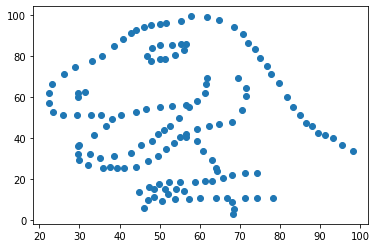

In [62]:
cond = df.dataset == 'dino'
plt.scatter(df[cond].x,df[cond].y)

and this is the **STAR** dataset

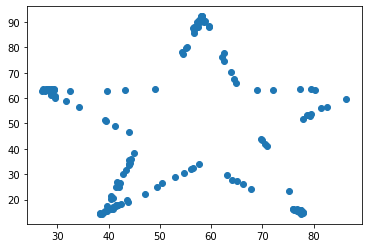

In [63]:
cond = df.dataset == 'star'
plt.scatter(df[cond].x,df[cond].y)


And as surprising as it may be, these 2 datasets have 

* the same mean and standard deviations values:


In [64]:
df[ df.dataset == 'star' ].describe()

,x,y
count,142.000000,142.000000
mean,54.267341,47.839545
std,16.768959,26.930275
min,27.024603,14.365590
25%,41.034210,20.374135
50%,56.534732,50.110554
75%,68.711493,63.548584
max,86.435897,92.214989


In [42]:
df[df.dataset == 'dino' ].describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


* the same correlation between x and y

In [43]:
print(df[df.dataset == 'star'][['x','y']].corr( ) )

          x         y
x  1.000000 -0.062961
y -0.062961  1.000000


In [44]:
print(df[df.dataset == 'dino'][['x','y']].corr( ) )

          x         y
x  1.000000 -0.064472
y -0.064472  1.000000


The datasaurus dozen dataset is available at the following url

https://www.autodeskresearch.com/publications/samestats
